In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Question 1

# Ques 1.a Creating Matrix M

In [2]:
M = np.zeros((101,101))

for i in range(101):
    for j in range(101):
        if j == i-1:
            M[i][j] = 1/6
            
        elif j == i-2:
            M[i][j] = 1/6
            
        elif j == i-3:
            M[i][j] = 1/6
            
        elif j == i-4:
            M[i][j] = 1/6
            
        elif j == i-5:
            M[i][j] = 1/6
            
        elif j == i-6:
            M[i][j] = 1/6
        
        if j>94 and i == 100:
            M[i][j] += (6-(i-j))*(1/6)


# Ques 1.b Checking if M is Markov's Matrix

In [3]:
markov = []

for j in range(101):
    sum = 0
    for i in range(101):
        sum += M[i][j]
    markov.append(round(sum))

#Because of fraction values in matrix M, round function is being used.    
    
result = len(markov) > 0 and all(elem == 1.0 for elem in markov)

print("The result if matrix is markov = ", result)
 
#References for code to check if all column entries sum upto 1 is:   
#https://thispointer.com/python-check-if-all-elements-in-a-list-are-same-or-matches-a-condition/

The result if matrix is markov =  True


# Ques 1.c Defining Initial state x0

In [4]:
x0 = [0]*101
x0[0] = 1

# Ques 1.d,1.e Defining function to find state after k moves

In [5]:
def next_state(x0,k,M):
    x_next = []*101
    x_next = (np.linalg.matrix_power(M,k))@(x0)
    return x_next

# Ques 1.f Finding steady state vector

In [6]:
#Prinitng the 1000th(infinity) move to calculate xinfinity
steady_vector = next_state(x0,1000,M).reshape(-1,1) 
print("steady state vector = ",steady_vector)

steady state vector =  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


# Ques 1.g Finding first eigen vector and comparing it to steady state vector

In [7]:
l, u = np.linalg.eig(M)
first = u[:,:1]

In [8]:
#To check if first eigen vector and steady vector are same

print("Is Steady vector = Eigen vector:", np.allclose(steady_vector,first))

Is Steady vector = Eigen vector: True


# Ques 1.h Probability function for <=k moves

In [9]:
def prob(x0,M,k):
    xk = next_state(x0,k,M)
    pk = xk[100]
    return pk   

In [10]:
#Round function is being used because of fraction probabilities in matrix M
p10 = prob(x0,M,10)
print("Probability of completing in 10 moves: ", round(p10))
p100 = prob(x0,M,100)
print("Probability of completing in 100 moves: ", round(p100))

Probability of completing in 10 moves:  0
Probability of completing in 100 moves:  1


Probability of finishing in 10 moves is 0 because the game cannot be finished in 10 moves, whereas game will be finished at a much earlier stage than 100 moves so cummulative probability of finishing it in 100 moves is 1

# Ques 1.i Plotting cummulative finish probability 

Text(0.5, 0, 'k moves')

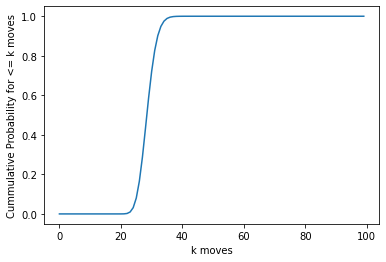

In [11]:
prob_plot = []

for i in range(100):
    p = prob(x0,M,i)
    prob_plot.append(p)
    
#print(prob_plot)

plt.show()
plt.plot(prob_plot)
plt.ylabel('Cummulative Probability for <= k moves')
plt.xlabel('k moves')

    

# Ques 1.j Exact probability function

In [12]:
def exact_prob(x0,M,k):
    pk = prob(x0,M,k)
    pk1 = prob(x0,M,(k-1))
    return pk - pk1

# Ques 1.k Plotting exact probability 

Text(0.5, 0, 'k moves')

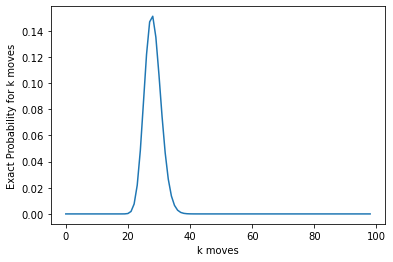

In [13]:
prob_plot1 = []
moves = 0
for i in range(1,100):
    p1 = exact_prob(x0,M,i)
    moves += i*p1
    prob_plot1.append(p1)  

#print(prob_plot1)

plt.show()
plt.plot(prob_plot1)
plt.ylabel('Exact Probability for k moves')
plt.xlabel('k moves')

# Ques 1.l Expected moves required to finish the game

In [14]:
#Rounding to get exact integer values
print("Expected number of moves to finish the game = ", round(moves))

Expected number of moves to finish the game =  29


# Question 2

# Ques 2.a Creating Matrix T

In [15]:
T = np.zeros((101,101))

T[39][1] = 1
T[14][4] = 1
T[31][9] = 1
T[44][36] = 1
T[84][28] = 1
T[67][51] = 1
T[100][80] = 1
T[91][71] = 1

T[6][16] = 1
T[26][47] = 1
T[11][49] = 1
T[53][56] = 1
T[60][64] = 1
T[73][92] = 1
T[75][95] = 1
T[78][98] = 1



#For entries with no chutes and ladders
for j in range(101):
        if np.argmax(T[:,j]) == 0:
            T[j][j] = 1       

# Ques 2.b Checking if T is Markov's Matrix

In [16]:
markov1 = []

for j in range(101):
    sum = 0
    for i in range(101):
        sum += T[i][j]
    markov1.append(sum)

    
result1 = len(markov1) > 0 and all(elem == 1.0 for elem in markov1)

print("The result if matrix T is markov = ", result1)

The result if matrix T is markov =  True


# Ques 2.c Finding matrix B = TM

In [17]:
B = T@M

# Checking if B is a markov matrix

In [18]:
markov2 = []

for j in range(101):
    sum = 0
    for i in range(101):
        sum += B[i][j]
    markov2.append(round(sum))

#Using round function because of fraction values in matrix M
    
result2 = len(markov2) > 0 and all(elem == 1.0 for elem in markov2)

print("The result if matrix B is markov = ", result2)

The result if matrix B is markov =  True


# Ques 2.d Performing tasks c to l in ques 1 on matrix B

# Task c Defining Initial state y0

In [19]:
y0 = [0]*101
y0[0] = 1

# Task d,e Defining function to find state after k moves

In [20]:
def next_state1(x0,k,B):
    x_next = []*101
    x_next = (np.linalg.matrix_power(B,k))@(x0)
    return x_next

# Task f Finding steady state vector

In [21]:
#Prinitng the 1000th(infinity) move to calculate xinfinity
steady_vector1 = next_state1(y0,1000,B).reshape(-1,1) 
print("steady state vector = ",steady_vector1)

steady state vector =  [[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.33823623e-49]
 [2.48789603e-50]
 [2.95041726e-50]
 [0.00000000e+00]
 [3.49892516e-50]
 [2.88967863e-49]
 [9.52156604e-50]
 [8.80381088e-50]
 [9.97799367e-50]
 [1.12844805e-49]
 [0.00000000e+00]
 [1.27318820e-49]
 [9.72668754e-50]
 [9.76482139e-50]
 [9.94348150e-50]
 [9.93706538e-50]
 [9.68656936e-50]
 [1.14873858e-49]
 [1.12560232e-49]
 [1.15403398e-49]
 [3.84685407e-49]
 [1.71734774e-49]
 [0.00000000e+00]
 [1.67179721e-49]
 [1.76903830e-49]
 [2.23855108e-49]
 [2.09027961e-49]
 [1.76371734e-49]
 [1.77233784e-49]
 [2.10183066e-49]
 [0.00000000e+00]
 [1.85289817e-49]
 [1.78120198e-49]
 [1.72374179e-49]
 [1.71631000e-49]
 [1.70589394e-49]
 [1.63228591e-49]
 [1.93574187e-49]
 [4.13292080e-49]
 [2.38834794e-49]
 [2.51190393e-49]
 [0.00000000e+00]
 [2.34267134e-49]
 [0.00000000e+00]
 [2.11486706e-49]
 [0.00000000e+00]
 [1.29567916e-49]
 [2.78563283e-49]
 [1.5

# Task g Finding first eigen vector and comparing it to steady state vector

In [22]:
l1, u1 = np.linalg.eig(B)
first1 = u1[:,:1]

In [23]:
#To check if first eigen vector and steady vector are same

print("Is Steady vector = Eigen vector:", np.allclose(steady_vector1,first1))

Is Steady vector = Eigen vector: True


# Task h Probability function for <=k moves

In [24]:
def prob1(x0,B,k):
    xk = next_state1(x0,k,B)
    pk = xk[100]
    return pk   

In [25]:

p10 = prob1(y0,B,10)
print("Probability of completing in 10 moves: ", p10)
p100 = prob1(y0,B,100)
print("Probability of completing in 100 moves: ", p100)

Probability of completing in 10 moves:  0.03846110592474047
Probability of completing in 100 moves:  0.9996797274489523


Probability of finishing in 10 moves is almost 0 because the game cannot be finished in 10 moves, whereas game will be finished at a much earlier stage than 100 moves so cummulative probability of finishing it in 100 moves is around 1/almost 1

# Task i Plotting cummulative finish probability 

Text(0.5, 0, 'k moves')

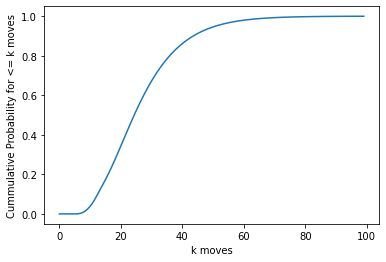

In [26]:
prob_plot2 = []

for i in range(100):
    p = prob1(y0,B,i)
    prob_plot2.append(p)
    
#print(prob_plot)

plt.show()
plt.plot(prob_plot2)
plt.ylabel('Cummulative Probability for <= k moves')
plt.xlabel('k moves')   

# Task j Exact probability function

In [27]:
def exact_prob1(x0,B,k):
    pk = prob(x0,B,k)
    pk1 = prob(x0,B,(k-1))
    return pk - pk1

# Task k Plotting exact probability 

Text(0.5, 0, 'k moves')

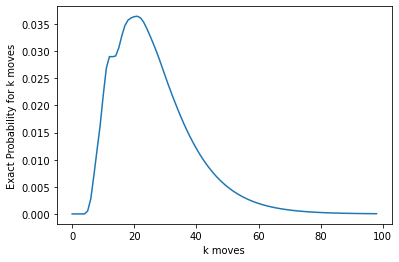

In [28]:
prob_plot3 = []
moves1 = 0

for i in range(1,100):
    p1 = exact_prob1(y0,B,i)
    moves1 += i*p1
    prob_plot3.append(p1)  

#print(prob_plot1)

plt.show()
plt.plot(prob_plot3)
plt.ylabel('Exact Probability for k moves')
plt.xlabel('k moves')

# Task l Expected moves required to finish the game

In [29]:
#Using round function to get exact integer moves
print("Expected number of moves to finish the game = ", round(moves1))

Expected number of moves to finish the game =  27
